tensor([[18, 24, 28],
        [ 8, 15, 24]])
tensor([70, 47])
tensor([75, 52])
tensor([75, 52])
weights_E_new:
tensor([2, 3, 4, 5])

X_E_new:
tensor([[9, 8, 7, 1],
        [4, 5, 6, 1]])
tensor([75, 52])
tensor([75, 52])
epoch: 0 - loss: 0.69315; acc: 0.349
epoch: 1000 - loss: 0.61885; acc: 0.676
epoch: 2000 - loss: 0.61605; acc: 0.685
epoch: 3000 - loss: 0.61403; acc: 0.686
epoch: 4000 - loss: 0.61253; acc: 0.689
epoch: 5000 - loss: 0.61142; acc: 0.694
epoch: 6000 - loss: 0.61057; acc: 0.699
epoch: 7000 - loss: 0.60992; acc: 0.702
epoch: 8000 - loss: 0.60942; acc: 0.702


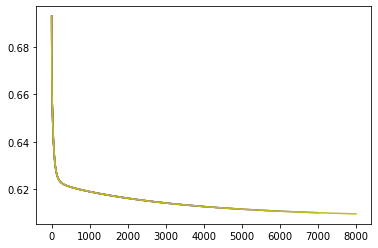

In [6]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
df = pd.read_csv(r'https://raw.githubusercontent.com/a-coders-guide-to-ai/a-coders-guide-to-neural-networks/master/data/diabetes.csv')
df.head()
weights_E = torch.tensor([2,3,4])
X_E = torch.tensor([[9,8,7], [4,5,6]])
X_E.shape
print(weights_E*X_E)
print(torch.sum(weights_E*X_E, axis=1))

weights_E@X_E.T
bias_E = torch.tensor([5])
print(weights_E@X_E.T + bias_E)
print(weights_E@X_E.T + bias_E*1)
weights_E_new = torch.cat((weights_E, bias_E), dim=0)
X_E_new = torch.cat((X_E, torch.ones(2, 1, dtype=int)), dim=1)
print('weights_E_new:')
print(weights_E_new)
print()
print('X_E_new:')
print(X_E_new)
print(weights_E@X_E.T + bias_E*1)
print(weights_E_new@X_E_new.T)
X = df[df.columns[:-1]]
y = df['Outcome']

X = torch.tensor(X.values)
y = torch.tensor(y.values)

X = torch.cat((X, torch.ones(X.shape[0], dtype=float).reshape(-1,1)), dim=1)
def log_loss(y, y_pred): ##log loss error (binary cross entropy)
  return -torch.sum((y*torch.log(y_pred) + (1-y)*torch.log(1-y_pred)))/y.shape[0]

def sigmoid(linear):
    return 1/(1+torch.exp(-linear))

epoch_loss = []

weights = torch.zeros(9, dtype=float, requires_grad=True)
learning_rate = 1e-4
n = X.shape[0]

for epoch in range(8000+1): 
    linear = weights.reshape(1,-1)@X.T ##one equation for all
    y_pred =  sigmoid(linear) ##logistic
    loss = log_loss(y, y_pred)
    epoch_loss.append(loss.item())

    ###backpropagation###
    loss.backward()

    ###step###
    with torch.no_grad():
        weights -= learning_rate * weights.grad

    weights.grad.zero_()

    if(epoch % 1000 == 0):
        acc = torch.sum(((y_pred>=0.5)+0 == y)+0).item()/y.shape[0]
        print('epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, epoch_loss[-1], acc))
        plt.plot(epoch_loss)
